In [2]:
import IPython

#文件来源
wav_file='WAV_1MG.wav'
#设置自动播放
IPython.display.Audio(wav_file,autoplay=True)


In [10]:
#读取音频文件
import wave
f = wave.open(wav_file)

print('采样率=',f.getframerate())
print('总帧数=',f.getnframes())
print('声道数=',f.getnchannels())
print('量化位数=',f.getsampwidth())
print('播放时长=',f.getnframes()/f.getframerate())

采样率= 8000
总帧数= 268237
声道数= 2
量化位数= 2
播放时长= 33.529625


C:\Users\dell\AppData\Local\Temp\ipykernel_22584\1356527543.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


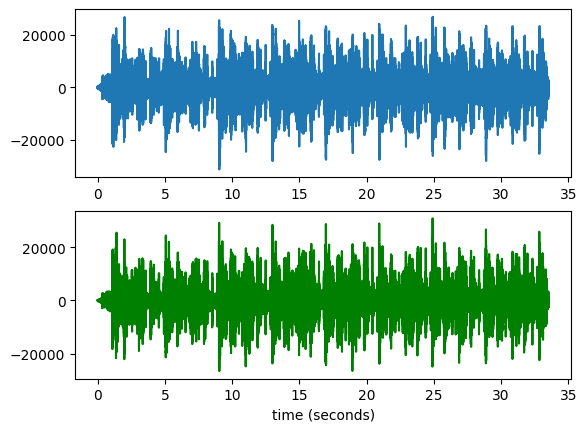

In [12]:

import wave
import pylab as pl 
import numpy as np 
# 打开WAV文档 
f = wave.open(r"WAV_1MG.wav", "rb") 
# 读取格式信息 
# (nchannels, sampwidth, framerate, nframes, comptype, compname) 
params = f.getparams() 
nchannels, sampwidth, framerate, nframes = params[:4] 
# 读取波形数据 
str_data = f.readframes(nframes) 
f.close() 
#将波形数据转换为数组 
wave_data = np.fromstring(str_data, dtype=np.short) 
if nchannels == 2:
    wave_data.shape = -1, 2 
    wave_data = wave_data.T 
    time = np.arange(0, nframes) * (1.0 / framerate) 
    # 绘制波形 
    pl.subplot(211) 
    pl.plot(time, wave_data[0]) 
    pl.subplot(212) 
    pl.plot(time, wave_data[1], c="g") 
    pl.xlabel("time (seconds)") 
    pl.show()
elif nchannels == 1:
    wave_data.shape = -1, 1 
    wave_data = wave_data.T 
    time = np.arange(0, nframes) * (1.0 / framerate) 
    # 绘制波形 
    pl.subplot(211) 
    pl.plot(time, wave_data[0]) 
    pl.xlabel("time (seconds)") 
    pl.show()

In [32]:
#录音
import  speech_recognition as sr
import pyttsx3
#列出计算机说话者
speak=pyttsx3.init()
voices=speak.getProperty('voices')
for voice in voices:
    print("Voices:")
    print("id:%s"%voice.id)
    print("name:%s"%voice.name)
    print("Languages:%s"%voice.languages)
    print("gender:%s"%voice.gender)
    print("age:%s"%voice.age)
#指定说话者
speak.setProperty('voices',voices[1].id)
#麦克风收音
r=sr.Recognizer()
with sr.Microphone() as source:
    #文字转语音
    speak.say('请说话……')
    #等待说完
    speak.runAndWait()
    #降噪
    r.adjust_for_ambient_noise(source)
    #麦克风收音
    audio=r.listen(source)
#保存录音文件
wave_file='man.wav'
with open(wave_file,"wb") as f:
    f.write(audio.get_wav_data(convert_rate=16000))


#语音识别
try:
    text=r.recognize_google(audio,language="zh")
    print(text)
except:
    pass

#显示识别准确度
dict1=r.recognize_google(audio,language='zh')
for i,item in dict1[alternative]:
    if i==0:
        print(f"信赖度={item[confidence]},{item[transcript]}")
    else:
        print(f"{item[transcript]}")

Voices:
id:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_ZH-CN_HUIHUI_11.0
name:Microsoft Huihui Desktop - Chinese (Simplified)
Languages:[]
gender:None
age:None
Voices:
id:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
name:Microsoft Zira Desktop - English (United States)
Languages:[]
gender:None
age:None
result2:
{   'alternative': [   {'confidence': 0.63806278, 'transcript': '哈哈这个'},
                       {'transcript': '他妈这么做'},
                       {'transcript': '哈哈哈'},
                       {'transcript': '他妈的'},
                       {'transcript': '他妈的歌'}],
    'final': True}
哈哈这个
result2:
{   'alternative': [   {'confidence': 0.63806272, 'transcript': '哈哈这个'},
                       {'transcript': '他妈这么做'},
                       {'transcript': '哈哈哈'},
                       {'transcript': '他妈的'},
                       {'transcript': '他妈的歌'}],
    'final': True}


NameError: name 'alternative' is not defined

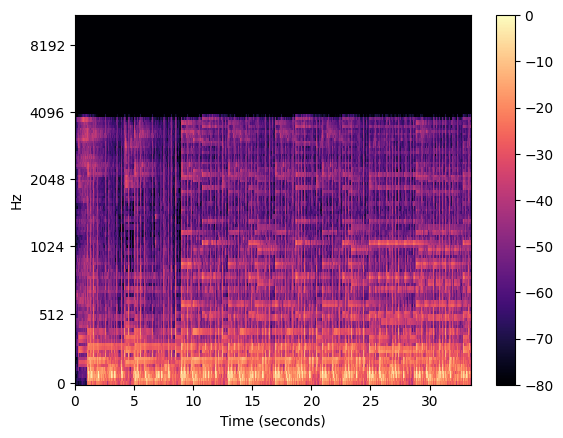

In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
wave_file='WAV_1MG.wav'
data,sr=librosa.load(wave_file)
#显示频谱图
spec = librosa.feature.melspectrogram(y=data)
#显示频谱图
db_spec=librosa.power_to_db(spec,ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel',x_axis='s',sr=sr)
plt.colorbar()